# Compliance Violations Among Retailers

In my work as an epidemiologist/evaluator for a local government, I work with a lot of tobacco retailer data (applications, licenses, policy enforcement visits, etc.) with personally identifiable information. Since I am unable to use real data to demonstrate and showcase my proficiency in Jupyter Notebooks and R, I generated a fake dataset using ChatGPT to mimic what my day-to-day looks like in my role. 

In [2]:
install.packages("dplyr")


# Load required library
library(dplyr)
library(stringr)
library(ggplot2)

# Set seed for reproducibility
set.seed(123)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Here's how I generated the fake dataset

In [3]:
# Create the unique Retailer IDs
retailer_ids <- str_pad(1:1000, width = 4, side = "left", pad = "0")
retailer_ids <- paste("RE", retailer_ids, sep = "")

# Generate fake store names manually (for simplicity)
store_names <- paste("Store", 1:1000)

# Define store types
store_types <- c("Convenience", "Supermarket", "Specialty", "Discount", "Pharmacy")
store_types_random <- sample(store_types, 1000, replace = TRUE)

# Generate random street addresses, cities, states, and zip codes
street_names <- c("Elm St", "Oak St", "Pine Ave", "Maple Dr", "Birch Blvd", "Cedar Ln", "Willow Way", "Cherry Blvd", "Main St", "Highland Rd")
cities <- c("Springfield", "Rivertown", "Centerville", "Westchester", "Easton", "Fairview", "Maplewood", "Hillside", "Parkside", "Lakeside")
states <- c("IL", "TX", "OH", "NY", "PA", "CA", "FL", "MI", "NC", "GA")
zip_codes <- c("62701", "75001", "44101", "10601", "18042", "90210", "33101", "48201", "28201", "30301")

# Generate random addresses using sample for street, city, state, and zip code
addresses <- paste(sample(1:9999, 1000, replace = TRUE), # Random street numbers
                   sample(street_names, 1000, replace = TRUE),
                   sample(cities, 1000, replace = TRUE),
                   sample(states, 1000, replace = TRUE),
                   sample(zip_codes, 1000, replace = TRUE), sep = ", ")

# Generate violation flags (Yes/No)
violations <- c("Yes", "No")
generate_violation <- function() {
  sample(violations, 1)
}

# Create a dataframe with violation columns
compliance_findings <- data.frame(
  Retailer_ID = retailer_ids,
  Store_Name = store_names,
  Store_Type = store_types_random,
  Address = addresses,
  Flavored_Product_Violation = replicate(1000, generate_violation()),
  Minimum_Price_Violation = replicate(1000, generate_violation()),
  Minimum_Package_Size_Violation = replicate(1000, generate_violation()),
  Self_Service_Violation = replicate(1000, generate_violation()),
  Sales_to_Minors_Violation = replicate(1000, generate_violation())
)

# View the first few rows of the dataset
head(compliance_findings)

,Retailer_ID,Store_Name,Store_Type,Address,Flavored_Product_Violation,Minimum_Price_Violation,Minimum_Package_Size_Violation,Self_Service_Violation,Sales_to_Minors_Violation
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,RE0001,Store 1,Specialty,"8167, Main St, Rivertown, PA, 62701",Yes,Yes,No,Yes,Yes
2,RE0002,Store 2,Specialty,"9468, Pine Ave, Lakeside, NC, 75001",No,No,Yes,No,No
3,RE0003,Store 3,Supermarket,"6534, Pine Ave, Springfield, FL, 44101",Yes,No,No,No,Yes
4,RE0004,Store 4,Supermarket,"1767, Oak St, Springfield, TX, 44101",No,No,No,No,Yes
5,RE0005,Store 5,Specialty,"6967, Cherry Blvd, Hillside, NC, 33101",Yes,Yes,No,Yes,Yes
6,RE0006,Store 6,Pharmacy,"8698, Maple Dr, Centerville, IL, 75001",No,Yes,No,Yes,No


## Data Processing

The Yes means they have a violation (Noncompliant) and the No means they don't have a violation (Compliant).The Yes/No options are great, but it would be more informative to identify whether the retailers are compliant or noncompliant for each violation. So, we'll recode the Yes and No options as Noncompliant and Compliant, respectively.

In [4]:
library(dplyr)

compliance_findings <- compliance_findings %>%
  mutate(
    Flavored_Product_Violation = recode(Flavored_Product_Violation, "Yes" = "Noncompliant", "No" = "Compliant"),
    Minimum_Price_Violation = recode(Minimum_Price_Violation, "Yes" = "Noncompliant", "No" = "Compliant"),
    Minimum_Package_Size_Violation = recode(Minimum_Package_Size_Violation, "Yes" = "Noncompliant", "No" = "Compliant"),
    Self_Service_Violation = recode(Self_Service_Violation, "Yes" = "Noncompliant", "No" = "Compliant"),
    Sales_to_Minors_Violation = recode(Sales_to_Minors_Violation, "Yes" = "Noncompliant", "No" = "Compliant")
  )

In [5]:
head(compliance_findings)

,Retailer_ID,Store_Name,Store_Type,Address,Flavored_Product_Violation,Minimum_Price_Violation,Minimum_Package_Size_Violation,Self_Service_Violation,Sales_to_Minors_Violation
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,RE0001,Store 1,Specialty,"8167, Main St, Rivertown, PA, 62701",Noncompliant,Noncompliant,Compliant,Noncompliant,Noncompliant
2,RE0002,Store 2,Specialty,"9468, Pine Ave, Lakeside, NC, 75001",Compliant,Compliant,Noncompliant,Compliant,Compliant
3,RE0003,Store 3,Supermarket,"6534, Pine Ave, Springfield, FL, 44101",Noncompliant,Compliant,Compliant,Compliant,Noncompliant
4,RE0004,Store 4,Supermarket,"1767, Oak St, Springfield, TX, 44101",Compliant,Compliant,Compliant,Compliant,Noncompliant
5,RE0005,Store 5,Specialty,"6967, Cherry Blvd, Hillside, NC, 33101",Noncompliant,Noncompliant,Compliant,Noncompliant,Noncompliant
6,RE0006,Store 6,Pharmacy,"8698, Maple Dr, Centerville, IL, 75001",Compliant,Noncompliant,Compliant,Noncompliant,Compliant


Let's check to see how many missing values we have in our dataset

In [6]:
sum(is.na(compliance_findings))

[1] 0

Let's also make a column that classifies whether the retailer has violations or doesn't have violations

In [7]:
compliance_findings <- compliance_findings %>%
  mutate(
    Violation_Status = case_when(
      Flavored_Product_Violation == "Compliant" & 
        Minimum_Price_Violation == "Compliant" & 
        Minimum_Package_Size_Violation == "Compliant" & 
        Self_Service_Violation == "Compliant" & 
        Sales_to_Minors_Violation == "Compliant" ~ "No Violations",
      TRUE ~ "Has Violations"
    )
  )


Obtaining frequencies for each violation, store type, and violation status

In [8]:
table(compliance_findings$Store_Type)
table(compliance_findings$Flavored_Product_Violation)
table(compliance_findings$Minimum_Price_Violation)
table(compliance_findings$Minimum_Package_Size_Violation)
table(compliance_findings$Self_Service_Violation)
table(compliance_findings$Sales_to_Minors_Violation)
table(compliance_findings$Violation_Status)


Convenience    Discount    Pharmacy   Specialty Supermarket 
        203         191         202         200         204 


   Compliant Noncompliant 
         498          502 


   Compliant Noncompliant 
         482          518 


   Compliant Noncompliant 
         466          534 


   Compliant Noncompliant 
         504          496 


   Compliant Noncompliant 
         520          480 


Has Violations  No Violations 
           977             23 

## Visualizations

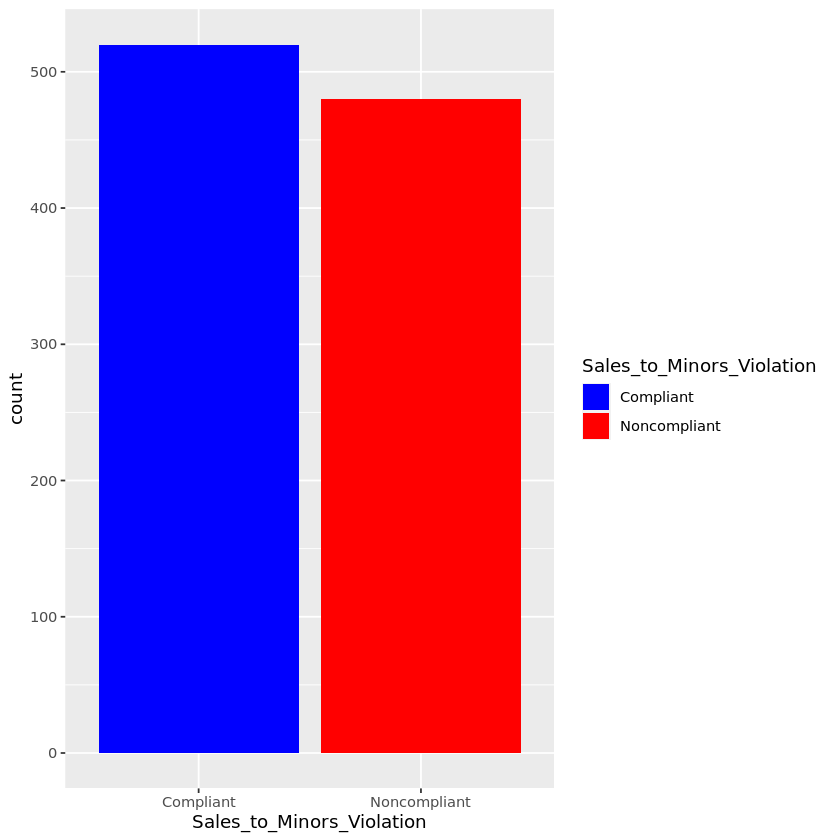

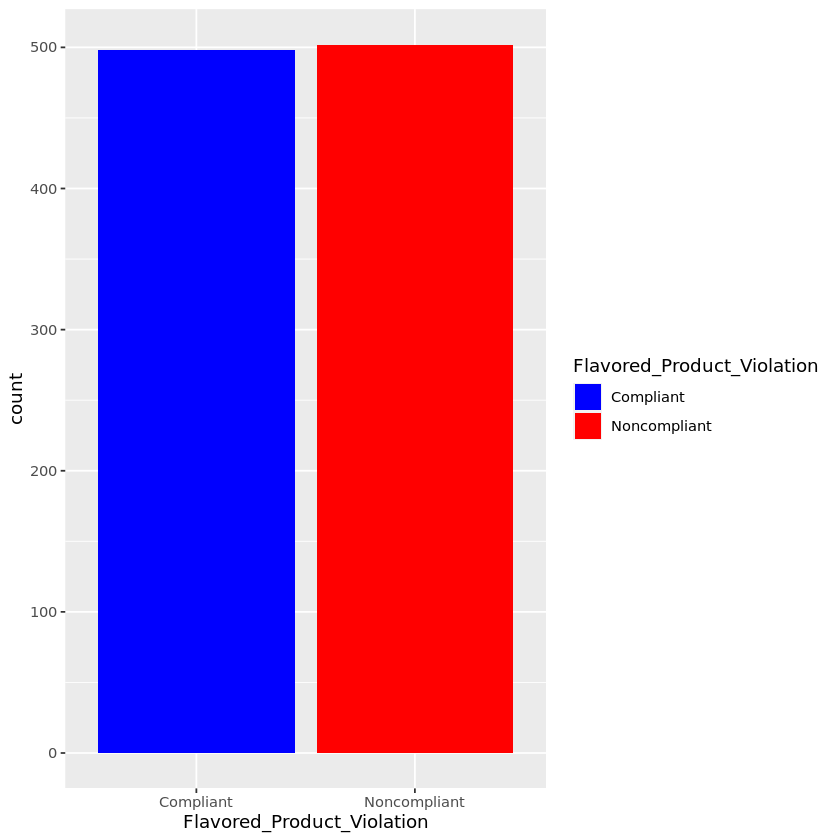

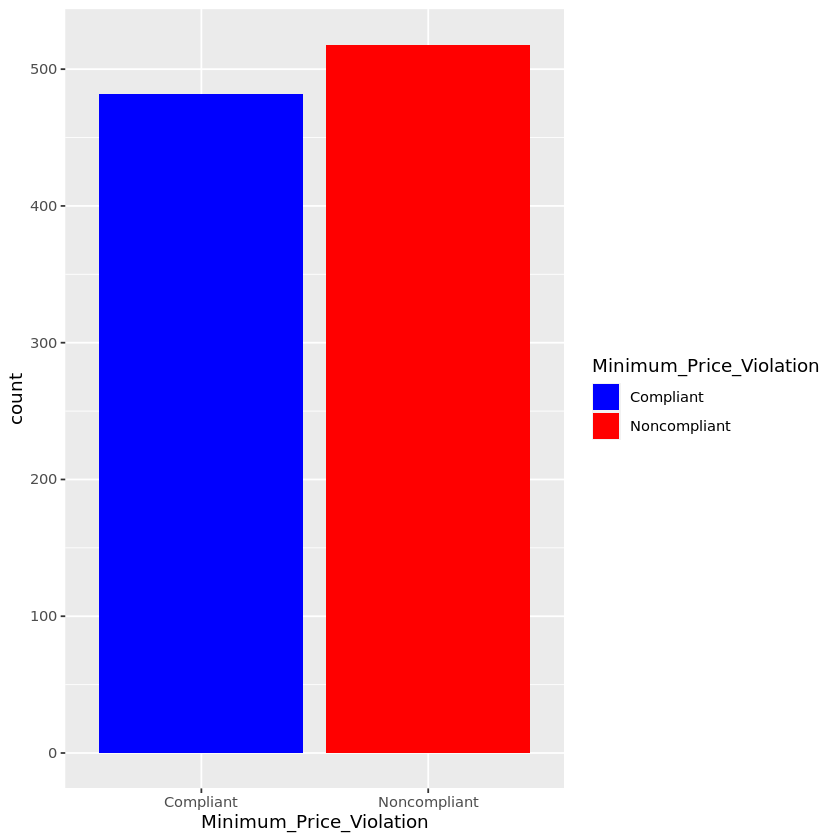

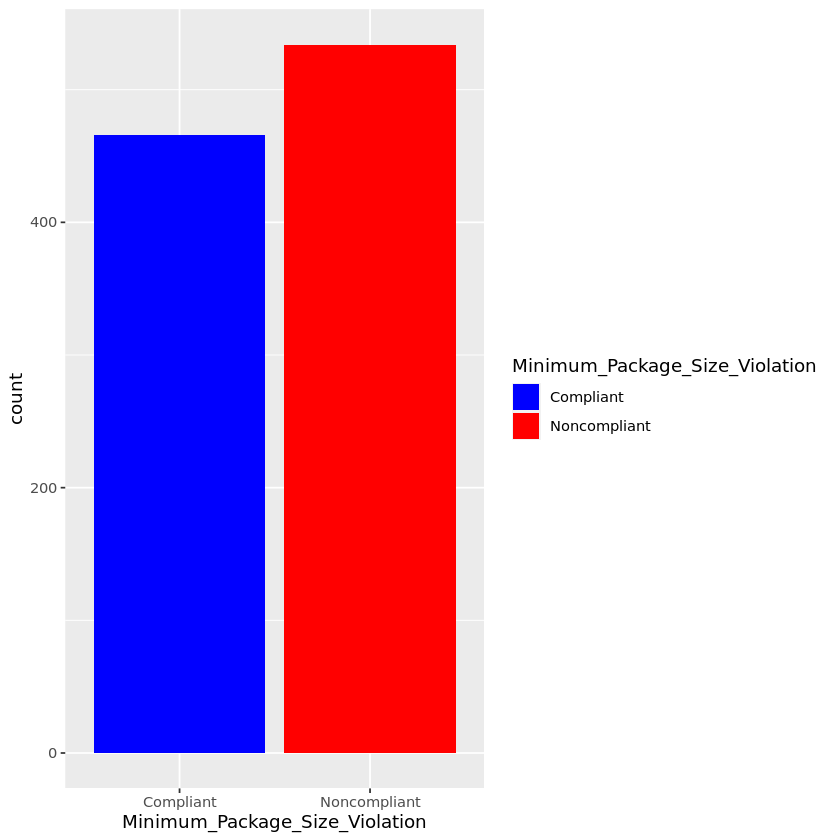

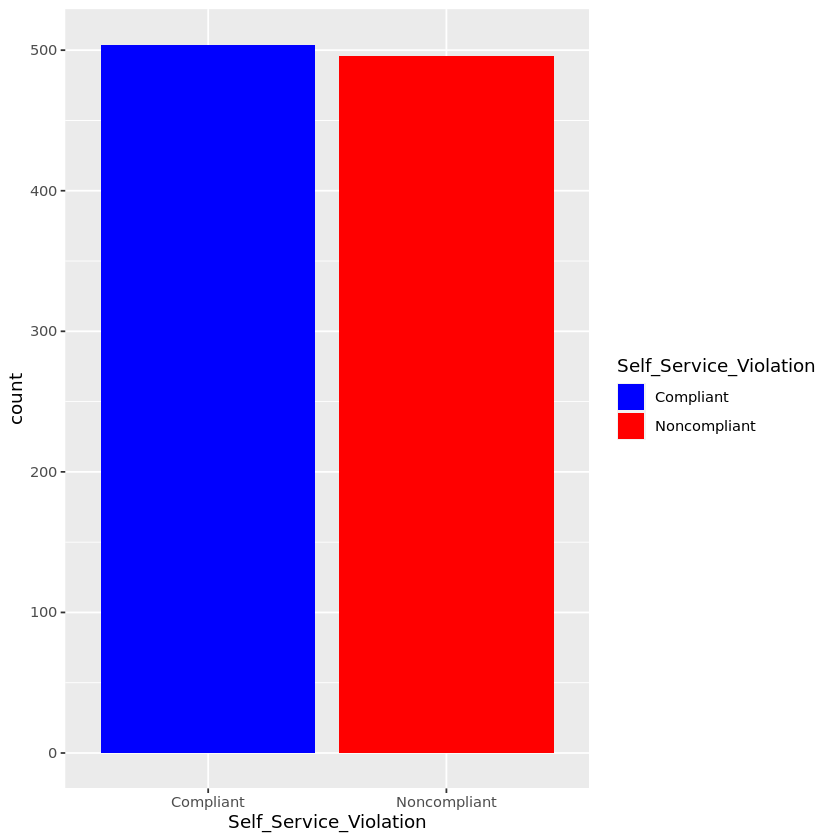

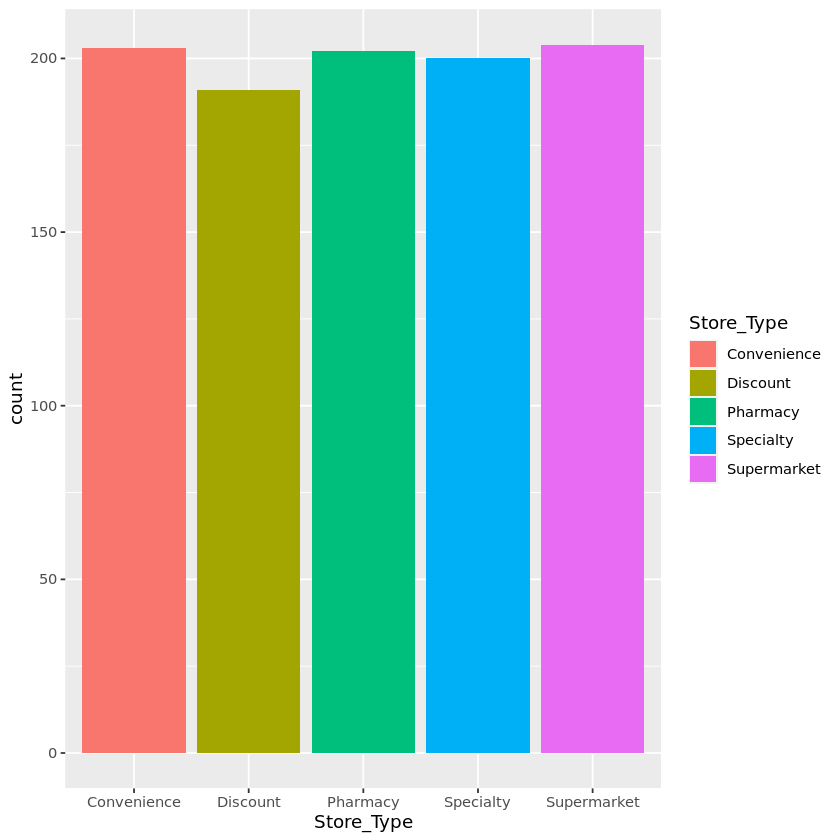

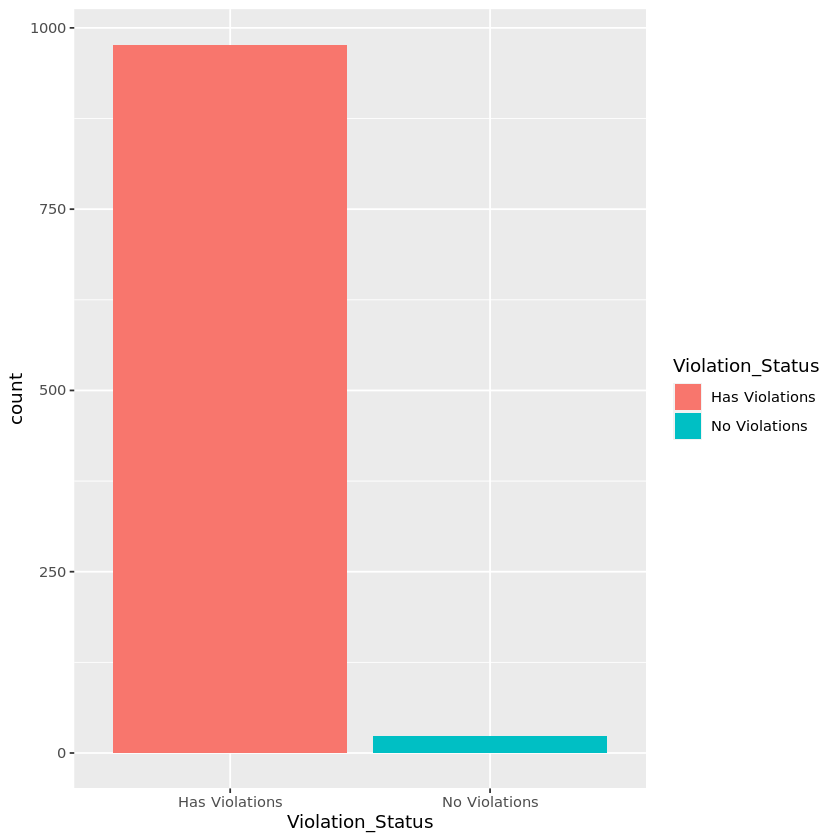

In [9]:
#produce a bar chart of all violations
ggplot(compliance_findings, aes(x=Sales_to_Minors_Violation, fill=Sales_to_Minors_Violation)) + geom_bar(stat="count") + scale_fill_manual(values = c("blue", "red"))

ggplot(compliance_findings, aes(x=Flavored_Product_Violation, fill=Flavored_Product_Violation)) + geom_bar(stat="count") + scale_fill_manual(values = c("blue", "red"))

ggplot(compliance_findings, aes(x=Minimum_Price_Violation, fill=Minimum_Price_Violation)) + geom_bar(stat="count") + scale_fill_manual(values = c("blue", "red"))                               

ggplot(compliance_findings, aes(x=Minimum_Package_Size_Violation, fill=Minimum_Package_Size_Violation)) + geom_bar(stat="count") + scale_fill_manual(values = c("blue", "red"))

ggplot(compliance_findings, aes(x=Self_Service_Violation, fill=Self_Service_Violation)) + geom_bar(stat="count") + scale_fill_manual(values = c("blue","red"))

#produce a bar chart of all store types
ggplot(compliance_findings, aes(x=Store_Type, fill=Store_Type)) + geom_bar(stat="count")

#produce a bar chart of all violation status'
ggplot(compliance_findings, aes(x=Violation_Status, fill=Violation_Status)) + geom_bar(stat="count")

## Hypothesis Testing

Since we're working with categorical variables, we can run a Chi Squre Test of Association. First, we make a contingency table.

In [12]:
StoreType_ViolationStatus_table <- table(compliance_findings$Violation_Status, compliance_findings$Store_Type)

print(StoreType_ViolationStatus_table)

                
                 Convenience Discount Pharmacy Specialty Supermarket
  Has Violations         196      185      200       196         200
  No Violations            7        6        2         4           4


Unfortunately, since we have small cell sizes, we can't do a Chi Square. 

## Closing Thoughts

Thank you for checking out my work! This is my very first project that I'm documenting in my portfolio as part of my data analytics/data science journey. If you have any feedback or advice, please feel free to let me know!

## Author
V. B. Valdez